In [1]:
%matplotlib inline
import numpy as np
import glob
import os
from fnmatch import fnmatch
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
def get_arrays(directory, pattern):
    t_equils = np.ndarray((0,4))
    for path, subdir, files in os.walk(directory):
        for name in files:
            if fnmatch(name, pattern):
                path = os.path.join(os.getcwd(), path, name)
                t_equil = np.load(path)
                t_equils = np.append(t_equils, t_equil, axis=0)
    return t_equils

In [3]:
pattern = 't_equil_sigma.npy'
eliminate = get_arrays('eliminate/', pattern)
eliminate_rand = get_arrays('eliminate_randomized/', pattern)
discrete = get_arrays('discrete/', pattern)
discrete_rand = get_arrays('discrete_randomized/', pattern)
cont = get_arrays('cont/', pattern)
cont_rand = get_arrays('cont_randomized/', pattern)

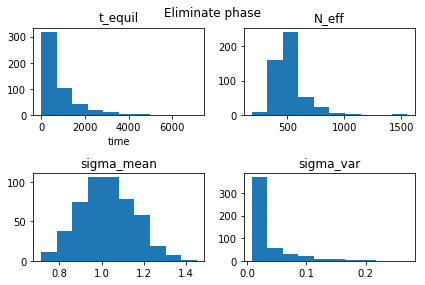

In [4]:
plt.suptitle('Eliminate phase')
plt.subplot(2, 2, 1)
plt.hist(eliminate[:, 0])
plt.title('t_equil')
plt.xlabel('time')
plt.subplot(2, 2, 2)
plt.title('N_eff')
plt.hist(eliminate[:, 1])
plt.subplot(2, 2, 3)
plt.title('sigma_mean')
plt.hist(eliminate[:, 2])
plt.subplot(2, 2, 4)
plt.title('sigma_var')
plt.hist(eliminate[:, 3])
plt.tight_layout()


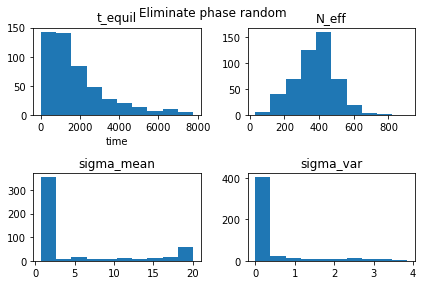

In [5]:
plt.suptitle('Eliminate phase random')
plt.subplot(2, 2, 1)
plt.hist(eliminate_rand[:, 0])
plt.title('t_equil')
plt.xlabel('time')
plt.subplot(2, 2, 2)
plt.title('N_eff')
plt.hist(eliminate_rand[:, 1])
plt.subplot(2, 2, 3)
plt.title('sigma_mean')
plt.hist(eliminate_rand[:, 2])
plt.subplot(2, 2, 4)
plt.title('sigma_var')
plt.hist(eliminate_rand[:, 3])
plt.tight_layout()


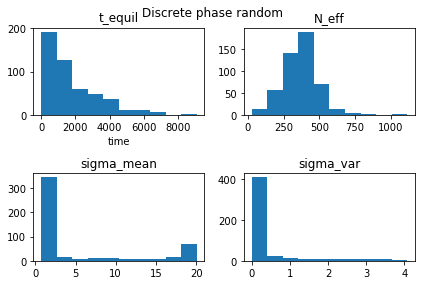

In [6]:
plt.suptitle('Discrete phase random')
plt.subplot(2, 2, 1)
plt.hist(discrete_rand[:, 0])
plt.title('t_equil')
plt.xlabel('time')
plt.subplot(2, 2, 2)
plt.title('N_eff')
plt.hist(discrete_rand[:, 1])
plt.subplot(2, 2, 3)
plt.title('sigma_mean')
plt.hist(discrete_rand[:, 2])
plt.subplot(2, 2, 4)
plt.title('sigma_var')
plt.hist(discrete_rand[:, 3])
plt.tight_layout()


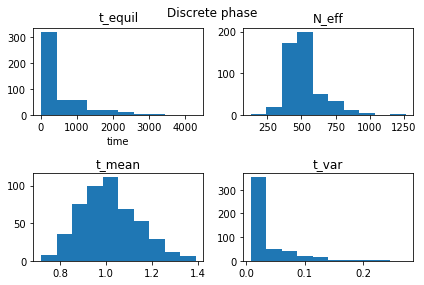

In [7]:
plt.suptitle('Discrete phase')
plt.subplot(2, 2, 1)
plt.hist(discrete[:, 0])
plt.title('t_equil')
plt.xlabel('time')
plt.subplot(2, 2, 2)
plt.title('N_eff')
plt.hist(discrete[:, 1])
plt.subplot(2, 2, 3)
plt.title('t_mean')
plt.hist(discrete[:, 2])
plt.subplot(2, 2, 4)
plt.title('t_var')
plt.hist(discrete[:, 3])
plt.tight_layout()


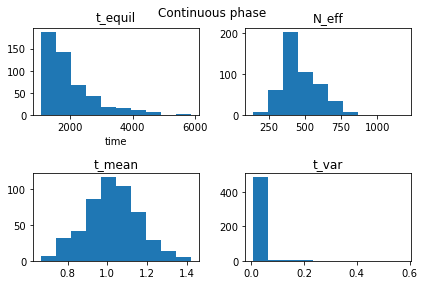

In [8]:
plt.suptitle('Continuous phase')
plt.subplot(2, 2, 1)
plt.hist(cont[:, 0])
plt.title('t_equil')
plt.xlabel('time')
plt.subplot(2, 2, 2)
plt.title('N_eff')
plt.hist(cont[:, 1])
plt.subplot(2, 2, 3)
plt.title('t_mean')
plt.hist(cont[:, 2])
plt.subplot(2, 2, 4)
plt.title('t_var')
plt.hist(cont[:, 3])
plt.tight_layout()


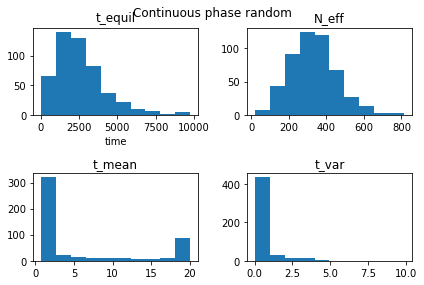

In [9]:
plt.suptitle('Continuous phase random')
plt.subplot(2, 2, 1)
plt.hist(cont_rand[:, 0])
plt.title('t_equil')
plt.xlabel('time')
plt.subplot(2, 2, 2)
plt.title('N_eff')
plt.hist(cont_rand[:, 1])
plt.subplot(2, 2, 3)
plt.title('t_mean')
plt.hist(cont_rand[:, 2])
plt.subplot(2, 2, 4)
plt.title('t_var')
plt.hist(cont_rand[:, 3])
plt.tight_layout()


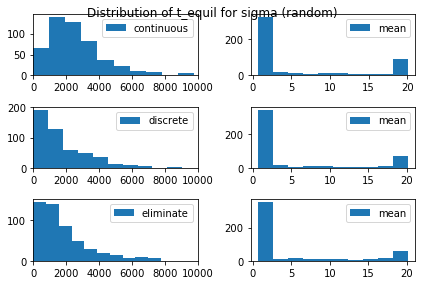

In [10]:
plt.subplot(3, 2, 1)
plt.suptitle('Distribution of t_equil for sigma (random)')
plt.hist(cont_rand[:, 0], label='continuous')
plt.xlim(0, 10000)
plt.legend()
plt.subplot(3, 2, 2)
plt.hist(cont_rand[:, 2], label='mean')
plt.legend()
plt.subplot(3, 2, 3)
plt.hist(discrete_rand[:, 0], label='discrete')
plt.legend()
plt.xlim(0, 10000)
plt.subplot(3, 2, 4)
plt.hist(discrete_rand[:, 2], label='mean')
plt.legend()
plt.subplot(3, 2, 5)
plt.hist(eliminate_rand[:, 0], label='eliminate')
plt.legend()
plt.xlim(0, 10000)
plt.subplot(3, 2, 6)
plt.hist(eliminate_rand[:, 2], label='mean')
plt.legend()
plt.tight_layout()

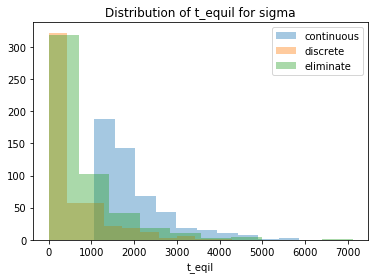

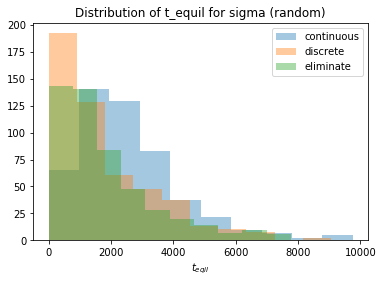

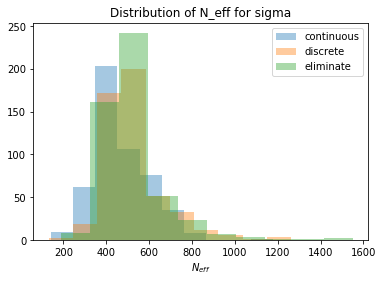

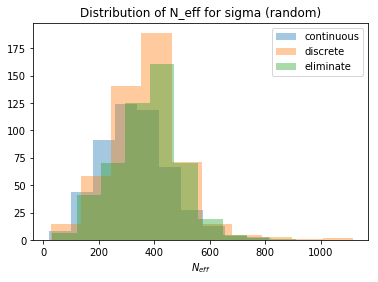

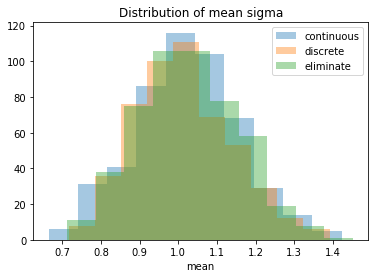

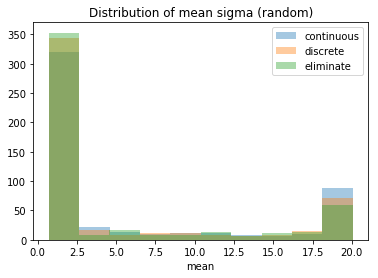

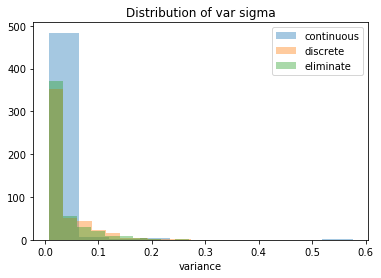

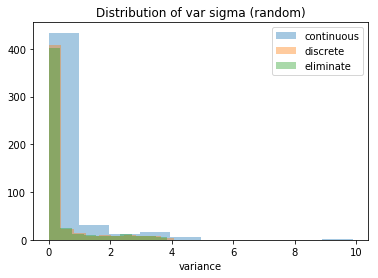

In [11]:
with PdfPages('t_equil_all.pdf') as pdf:
    plt.figure(1)
    alpha = 0.4
    plt.hist(cont[:, 0], alpha=alpha, label='continuous')
    plt.hist(discrete[:, 0], alpha=alpha, label='discrete')
    plt.hist(eliminate[:, 0], alpha=alpha, label='eliminate')
    plt.legend()
    plt.xlabel('t_eqil')
    plt.title('Distribution of t_equil for sigma')
    pdf.savefig()
    
    plt.figure(2)
    alpha = 0.4
    plt.hist(cont_rand[:, 0], alpha=alpha, label='continuous')
    plt.hist(discrete_rand[:, 0], alpha=alpha, label='discrete')
    plt.hist(eliminate_rand[:, 0], alpha=alpha, label='eliminate')
    plt.legend()
    plt.xlabel(r'$t_{eqil}$')
    plt.title('Distribution of t_equil for sigma (random)')
    pdf.savefig()
    
    plt.figure(3)
    alpha = 0.4
    plt.hist(cont[:, 1], alpha=alpha, label='continuous')
    plt.hist(discrete[:, 1], alpha=alpha, label='discrete')
    plt.hist(eliminate[:, 1], alpha=alpha, label='eliminate')
    plt.legend()
    plt.xlabel(r'$N_{eff}$')
    plt.title('Distribution of N_eff for sigma')
    pdf.savefig()
    
    plt.figure(4)
    alpha = 0.4
    plt.hist(cont_rand[:, 1], alpha=alpha, label='continuous')
    plt.hist(discrete_rand[:, 1], alpha=alpha, label='discrete')
    plt.hist(eliminate_rand[:, 1], alpha=alpha, label='eliminate')
    plt.legend()
    plt.xlabel(r'$N_{eff}$')
    plt.title('Distribution of N_eff for sigma (random)')
    pdf.savefig()
    
    plt.figure(5)
    alpha = 0.4
    plt.hist(cont[:, 2], alpha=alpha, label='continuous')
    plt.hist(discrete[:, 2], alpha=alpha, label='discrete')
    plt.hist(eliminate[:, 2], alpha=alpha, label='eliminate')
    plt.legend()
    plt.xlabel(r'mean')
    plt.title('Distribution of mean sigma')
    pdf.savefig()
    
    plt.figure(6)
    alpha = 0.4
    plt.hist(cont_rand[:, 2], alpha=alpha, label='continuous')
    plt.hist(discrete_rand[:, 2], alpha=alpha, label='discrete')
    plt.hist(eliminate_rand[:, 2], alpha=alpha, label='eliminate')
    plt.legend()
    plt.xlabel(r'mean')
    plt.title('Distribution of mean sigma (random)')
    pdf.savefig()
    
    plt.figure(7)
    alpha = 0.4
    plt.hist(cont[:, 3], alpha=alpha, label='continuous')
    plt.hist(discrete[:, 3], alpha=alpha, label='discrete')
    plt.hist(eliminate[:, 3], alpha=alpha, label='eliminate')
    plt.legend()
    plt.xlabel(r'variance')
    plt.title('Distribution of var sigma')
    pdf.savefig()
    
    plt.figure(8)
    alpha = 0.4
    plt.hist(cont_rand[:, 3], alpha=alpha, label='continuous')
    plt.hist(discrete_rand[:, 3], alpha=alpha, label='discrete')
    plt.hist(eliminate_rand[:, 3], alpha=alpha, label='eliminate')
    plt.legend()
    plt.xlabel(r'variance')
    plt.title('Distribution of var sigma (random)')
    pdf.savefig()





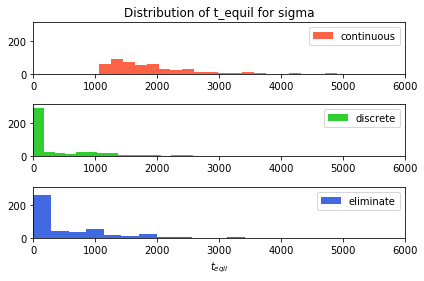

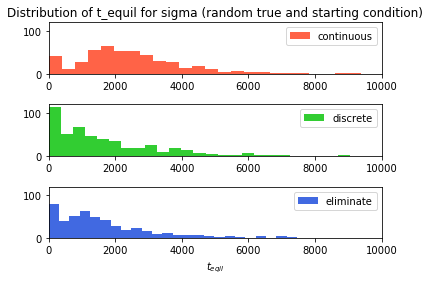

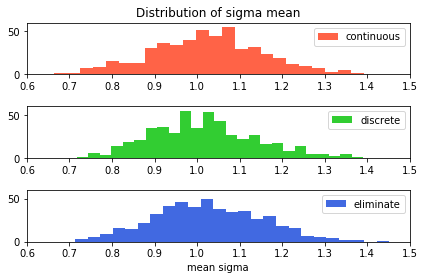

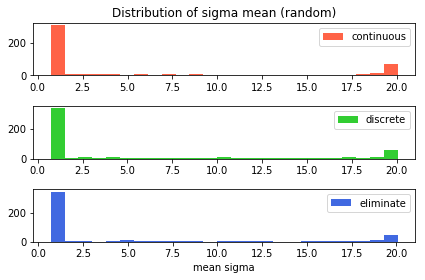

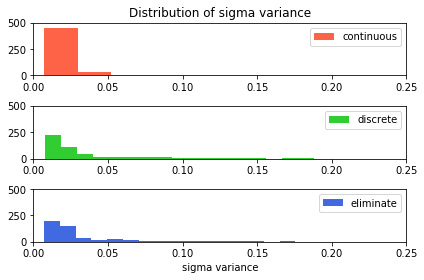

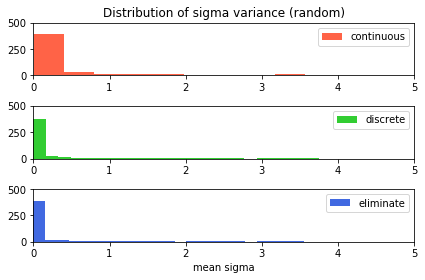

In [12]:
with PdfPages('t_equil.pdf') as pdf:
    plt.subplot(3, 1, 1)
    plt.title('Distribution of t_equil for sigma')
    plt.hist(cont[:, 0], color='tomato', label='continuous', bins=25)
    plt.legend()
    plt.xlim(0, 6000)
    plt.ylim(0, 310)
    plt.subplot(3, 1, 2)
    plt.hist(discrete[:, 0], color='limegreen', label='discrete', bins=25)
    plt.legend()
    plt.xlim(0, 6000)
    plt.ylim(0, 310)
    plt.subplot(3, 1, 3)
    plt.hist(eliminate[:, 0], color='royalblue', label='eliminate', bins=25)
    plt.xlim(0, 6000)
    plt.ylim(0, 310)
    plt.legend()
    plt.xlabel(r'$t_{eqil}$')
    plt.tight_layout()
    pdf.savefig()
    
    plt.figure(2)
    plt.subplot(3, 1, 1)
    plt.title('Distribution of t_equil for sigma (random true and starting condition)')
    plt.hist(cont_rand[:, 0], label='continuous', color='tomato', bins=25)
    plt.legend()
    plt.xlim(0, 10000)
    plt.ylim(0, 120)
    plt.subplot(3, 1, 2)
    plt.hist(discrete_rand[:, 0], label='discrete', color='limegreen', bins=25)
    plt.legend()
    plt.xlim(0, 10000)
    plt.ylim(0, 120)
    plt.subplot(3, 1, 3)
    plt.hist(eliminate_rand[:, 0], label='eliminate', color='royalblue', bins=25)
    plt.xlim(0, 10000)
    plt.ylim(0, 120)
    plt.legend()
    plt.xlabel(r'$t_{eqil}$')
    plt.tight_layout()
    pdf.savefig()
    
    plt.figure(3)
    plt.subplot(3, 1, 1)
    plt.title('Distribution of sigma mean')
    plt.hist(cont[:, 2], color='tomato', label='continuous', bins=25)
    plt.legend()
    plt.xlim(0.6, 1.5)
    plt.ylim(0, 60)
    plt.subplot(3, 1, 2)
    plt.hist(discrete[:, 2], color='limegreen', label='discrete', bins=25)
    plt.legend()
    plt.xlim(0.6, 1.5)
    plt.ylim(0, 60)
    plt.subplot(3, 1, 3)
    plt.hist(eliminate[:, 2], color='royalblue', label='eliminate', bins=25)
    plt.xlim(0.6, 1.5)
    plt.ylim(0, 60)
    plt.legend()
    plt.xlabel(r'mean sigma')
    plt.tight_layout()
    pdf.savefig()
    
    plt.figure(4)
    plt.subplot(3, 1, 1)
    plt.title('Distribution of sigma mean (random)')
    plt.hist(cont_rand[:, 2], color='tomato', label='continuous', bins=25)
    plt.legend()
    #plt.xlim(0, 6000)
    plt.subplot(3, 1, 2)
    plt.hist(discrete_rand[:, 2], color='limegreen', label='discrete', bins=25)
    plt.legend()
    #plt.xlim(0, 6000)
    plt.subplot(3, 1, 3)
    plt.hist(eliminate_rand[:, 2], color='royalblue', label='eliminate', bins=25)
    #plt.xlim(0, 6000)
    plt.legend()
    plt.xlabel(r'mean sigma')
    plt.tight_layout()
    pdf.savefig()
    
    plt.figure(5)
    plt.subplot(3, 1, 1)
    plt.title('Distribution of sigma variance')
    plt.hist(cont[:, 3], color='tomato', label='continuous', bins=25)
    plt.legend()
    plt.xlim(0, 0.25)
    plt.ylim(0, 500)
    plt.subplot(3, 1, 2)
    plt.hist(discrete[:, 3], color='limegreen', label='discrete', bins=25)
    plt.legend()
    plt.xlim(0, 0.25)
    plt.ylim(0, 500)
    plt.subplot(3, 1, 3)
    plt.hist(eliminate[:, 3], color='royalblue', label='eliminate', bins=25)
    plt.xlim(0, 0.25)
    plt.ylim(0, 500)
    plt.legend()
    plt.xlabel(r'sigma variance')
    plt.tight_layout()
    pdf.savefig()
    
    plt.figure(6)
    plt.subplot(3, 1, 1)
    plt.title('Distribution of sigma variance (random)')
    plt.hist(cont_rand[:, 3], color='tomato', label='continuous', bins=25)
    plt.legend()
    plt.xlim(0, 5)
    plt.ylim(0, 500)
    plt.subplot(3, 1, 2)
    plt.hist(discrete_rand[:, 3], color='limegreen', label='discrete', bins=25)
    plt.legend()
    plt.xlim(0, 5)
    plt.ylim(0, 500)
    plt.subplot(3, 1, 3)
    plt.hist(eliminate_rand[:, 3], color='royalblue', label='eliminate', bins=25)
    plt.xlim(0, 5)
    plt.ylim(0, 500)
    plt.legend()
    plt.xlabel(r'mean sigma')
    plt.tight_layout()
    pdf.savefig()

In [21]:
print('Max t_equil: {}'.format(eliminate[:, 0].max()))
print('Min t_equil: {}'.format(eliminate[:, 0].min()))
print('mean t_equil: {}'.format(eliminate[:, 0].mean()))
print('std t_equil: {}'.format(eliminate[:, 0].std()))

Max t_equil: 7116.0
Min t_equil: 0.0
mean t_equil: 678.454
std t_equil: 911.7366899955272


In [20]:
print('Max t_equil: {}'.format(discrete[:, 0].max()))
print('Min t_equil: {}'.format(discrete[:, 0].min()))
print('mean t_equil: {}'.format(discrete[:, 0].mean()))
print('sdt t_equil: {}'.format(discrete[:, 0].std()))

Max t_equil: 4292.0
Min t_equil: 0.0
mean t_equil: 511.314
sdt t_equil: 740.5977068584536


In [19]:
print('Max t_equil: {}'.format(cont[:, 0].max()))
print('Min t_equil: {}'.format(cont[:, 0].min()))
print('Mean t_equil: {}'.format(cont[:, 0].mean()))
print('var t_equil: {}'.format(cont[:, 0].std()))

Max t_equil: 5862.0
Min t_equil: 1063.0
Mean t_equil: 1990.278
var t_equil: 842.9996279453508


In [18]:
print('Max t_equil: {}'.format(cont_rand[:, 0].max()))
print('Min t_equil: {}'.format(cont_rand[:, 0].min()))
print('Mean t_equil: {}'.format(cont_rand[:, 0].mean()))
print('var t_equil: {}'.format(cont_rand[:, 0].std()))

Max t_equil: 9760.0
Min t_equil: 0.0
Mean t_equil: 2552.106
var t_equil: 1696.8577296768283


In [22]:
print('Max t_equil: {}'.format(discrete_rand[:, 0].max()))
print('Min t_equil: {}'.format(discrete_rand[:, 0].min()))
print('Mean t_equil: {}'.format(discrete_rand[:, 0].mean()))
print('var t_equil: {}'.format(discrete_rand[:, 0].std()))

Max t_equil: 9062.0
Min t_equil: 0.0
Mean t_equil: 1714.216
var t_equil: 1642.3513659823222


In [24]:
print('Max t_equil: {}'.format(eliminate_rand[:, 0].max()))
print('Min t_equil: {}'.format(eliminate_rand[:, 0].min()))
print('Mean t_equil: {}'.format(eliminate_rand[:, 0].mean()))
print('var t_equil: {}'.format(eliminate_rand[:, 0].std()))

Max t_equil: 7768.0
Min t_equil: 0.0
Mean t_equil: 1791.616
var t_equil: 1623.9097698283608


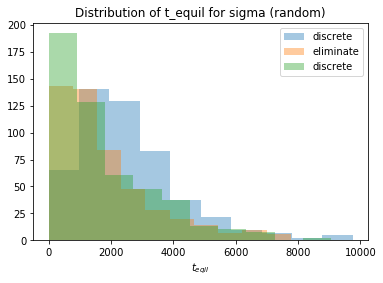

In [29]:
alpha = 0.4
plt.hist(cont_rand[:, 0], alpha=alpha, label='discrete')
plt.hist(eliminate_rand[:, 0], alpha=alpha, label='eliminate')
plt.hist(discrete_rand[:, 0], alpha=alpha, label='discrete')
plt.legend()
plt.xlabel(r'$t_{eqil}$')
plt.title('Distribution of t_equil for sigma (random)')
plt.savefig('t_equil_rand.png')


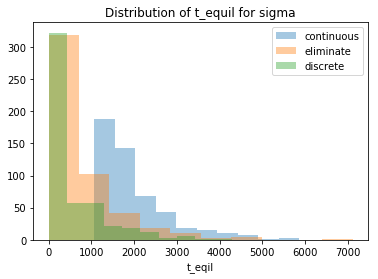

In [27]:
alpha = 0.4
plt.hist(cont[:, 0], alpha=alpha, label='continuous')
plt.hist(eliminate[:, 0], alpha=alpha, label='eliminate')
plt.hist(discrete[:, 0], alpha=alpha, label='discrete')

plt.legend()
plt.xlabel('t_eqil')
plt.title('Distribution of t_equil for sigma')
plt.savefig('t_equil.png')